<a href="https://colab.research.google.com/github/Paavani-git/Machine_Learning/blob/main/Labsheet_3_pavani(19041).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bayes Classifier
Bayes Theorem is a method to determine conditional probabilities – that is, the probability of one event occurring given that another event has already occurred.

**Prior Probability** - P($ω_j$) It is the probability of an event before new data is collected. 
**Posterior Probability** - P($x|ω_j$) It is updated probability event occuring after considering new information
**Likelihood** - p($x|ω_j$)

**Bayes Theorm:**
$$P(ω_j|x) = \frac{p(x|ω_j)P(\omega_j))}{P(x)}$$
**Bayes Classifier for multiple features and 
multi-class classification framework:**
Let ${ω_1,ω_2,....,ω_c}$ be the set of "C" state of classes.
=>d dimensional feature vector **x**.
Steps
1. We compute the posterior probabilty of the pattern w.r.t each of the classes "c".
2. We assign the pattern to the class for which the posterior probabilty is greatest.

$$ω_{test} = argmax_j P(ω|x)=\frac{p(x|ω_j)P(\omega_j))}{P(x)}$$
$$P(x) = \sum_{j=1}^{c} p(x|ω_j)P(ω_j)$$

$ω_{test}$ is the class for which posterior probaility is highest.





**Question 1**



Build a rudimentary pattern recognizer by making use of the Bayesian decision
theory concepts discussed in class. To this goal, you are given training images of 3 characters in a folder named  **TrainCharacters.zip**. There are 200 training images of size 128 × 128 for each character class. For evaluating the classifiers, you are provided 300 test images of size 128 × 128 in a separate folder **TestCharacters.zip** .

Assume the samples to be generated from a multi dimensional Gaussian distribution, having class specific mean vectors $\boldsymbol{\mu}_i$. Consider each of the modelling schemes for computing the covariance matrix



1.   The samples of a given character class are modelled by a separate covariance matrix $\boldsymbol{\Sigma}_i$.
2.   The samples across all the character classes are pooled together to generate a common non diagonal covariance matrix $\boldsymbol{\Sigma}$.



For each scenario, build a generative Bayesian classifier using the training images and categorize the 300 character samples contained in the test folder. The mean and the covariance matrices are to be estimated from the training data
using the Maximum Likelihood techniques. Report the individual character accuracies as well as the averaged accuracy for each of the models. Compare the results obtained for scenarios 1 and 2 and **provide inferences** for the obtained results. 

Employ the pixel intensity values of the 32 x 32 resized version of the original image as features (after appropriate normalization). However, note that in order to beat the curse of
dimensionality, you have to add a regularization term of the form $\lambda \textbf{I}$ in the computation of the covariance matrix. Assume $\lambda$ value to be 0.5.


In [ ]:

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from glob import glob
from decimal import *
import math
from scipy.stats import multivariate_normal

In [ ]:
path1 = glob("/content/drive/MyDrive/TrainCharacters/1/*.jpg")
path2 = glob("/content/drive/MyDrive/TrainCharacters/2/*.jpg")
path3 = glob("/content/drive/MyDrive/TrainCharacters/3/*.jpg")
path_test1 = glob("/content/drive/MyDrive/TestCharacters/1/*.jpg")
path_test2 = glob("/content/drive/MyDrive/TestCharacters/2/*.jpg")
path_test3 = glob("/content/drive/MyDrive/TestCharacters/3/*.jpg")

In [ ]:
import math
def gauss(x,m,c):               #postierer probability gaussain varient
  w_1 = -0.5*(math.log(np.linalg.det(c),np.e))
  d=x.shape[0]
  u=x-m
  w1=np.linalg.inv(c)
  w_1_1 = -0.5*np.matmul(u.transpose(),np.matmul(w1,u))
  w_1_0 = -0.5*d*math.log(2*np.pi,np.e) + math.log(1/3.0,np.e)         
  g = w_1+w_1_0+w_1_1
  print(x)
  print(m)
  print(c)
  return (g[0][0])

In [ ]:
def imagepath(path,shape):
  image = cv.imread(path)
  image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  image = cv.resize(image,(32,32))
  image = image/255.0
  image = image.reshape((1024,1))
  return (np.array(image))


In [ ]:
def mean_(path,shape):
  data = []
  mean = np.zeros((shape[0]*shape[1],1))
  for img in range(len(path)):
     image = cv.imread(path[img])
     image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
     image = cv.resize(image,(32,32))
     image = image/255.0
     shape = image.shape
     image = image.reshape((1024,1))
     data.append(image)
     mean = mean + image
  mean = mean/200
  return (mean,data)


In [ ]:
def covar(mean,data):
  covar = np.zeros((1024,1024))
  data = np.array(data)
  for i in range(200):
    covar = covar + np.dot((data[i] - mean),(data[i]-mean).transpose())
  covar = covar/200
  return covar


In [ ]:
shape1 = (32,32)
mean1, data1 = mean_(path1,shape1)
mean2, data2 = mean_(path2, shape1)
mean3, data3 = mean_(path3, shape1)
mean_com,data_com = mean_(path1+path2+path3,shape1)              #pooled mean


In [ ]:
reg_fact = 0.5*(np.identity(1024))
covar1 = covar(mean1,data1)+reg_fact
covar2 = covar(mean2,data2)+reg_fact
covar3 = covar(mean3,data3)+reg_fact
covar_com = covar(mean_com,data_com)+reg_fact

In [ ]:
count = 0
mis_classification_1 = []

for i in range(len(path_test1)):
  sample = imagepath(path_test1[i], (32,32))
  check = np.array([gauss(sample,mean1, covar1), gauss(sample,mean2, covar2),gauss(sample,mean3,covar3)])
  if np.argmax(check) == 0:
    count = count + 1
  else:
    mis_classification_1.append([np.argmax(check),0,path_test1[i]])
print(count)
count_class1=count


for i in range(len(path_test2)):
  sample = imagepath(path_test2[i], (32,32))
  check = np.array([gauss(sample,mean1, covar1), gauss(sample,mean2, covar2),gauss(sample,mean3,covar3)])
  if np.argmax(check) == 1:
    count = count + 1
  else:
    mis_classification_1.append([np.argmax(check),1,path_test2[i]])
count_class2=count-count_class1
print(count_class2)

for i in range(len(path_test3)):
  sample = imagepath(path_test3[i], (32,32))
  check = np.array([gauss(sample,mean1, covar1), gauss(sample,mean2, covar2),gauss(sample,mean3,covar3)])
  if np.argmax(check) == 2:
    count = count + 1
  else:
    mis_classification_1.append([np.argmax(check),2,path_test3[i]])
count_class3=count-count_class1-count_class2
print(count_class3)    
print ()
print ("accuracy:",(count/(len(path_test1) + len(path_test2) + len(path_test3)))*100)





[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
[[0.5 0.  0.  ... 0.  0.  0. ]
 [0.  0.5 0.  ... 0.  0.  0. ]
 [0.  0.  0.5 ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.5 0.  0. ]
 [0.  0.  0.  ... 0.  0.5 0. ]
 [0.  0.  0.  ... 0.  0.  0.5]]


## Pooled covariance

In [ ]:
count1 = 0
mis_classification_2 = []

for i in range(len(path_test1)):
  sample = imagepath(path_test1[i], (32,32))
  check = np.array([gauss(sample,mean1, covar_com), gauss(sample,mean2, covar_com),gauss(sample,mean3,covar_com)])
  if np.argmax(check) == 0:
    count1 = count1 + 1
  else:
    mis_classification_2.append([np.argmax(check),0,path_test1[i]])
print(count1)

count_class1=count1    
for i in (range(len(path_test2))):
  sample = imagepath(path_test2[i], (32,32))
  check = np.array([gauss(sample,mean1, covar_com), gauss(sample,mean2, covar_com),gauss(sample,mean3,covar_com)])
  if np.argmax(check) == 1:
    count1= count1 + 1
  else:
    mis_classification_2.append([np.argmax(check),1,path_test2[i]])
count_class2=count1-count_class1
print(count_class2)    

for i in range(len(path_test3)):
  sample = imagepath(path_test3[i], (32,32))
  check = np.array([gauss(sample,mean1, covar_com), gauss(sample,mean2, covar_com),gauss(sample,mean3,covar_com)])
  if np.argmax(check) == 2:
    count1 = count1 + 1
  else:
    mis_classification_2.append([np.argmax(check),2,path_test3[i]])

count_class3=count1-count_class1-count_class2
print(count_class3)     
print ()
print ((count1/(len(path_test1) + len(path_test2) + len(path_test3)))*100)

89
90
99

92.66666666666666


In [ ]:
import glob
import cv2 as cv
from glob import glob
import numpy as np
def imagepath(path):
  cv_img = []
  # c=0
  array_1 = []
  for img in range(len(path)):
    n = cv.imread(path[img])
    n = cv.cvtColor(n, cv.COLOR_BGR2GRAY)            #RGB to GRAY SCALE IMAGE CONVERSION
    cv_img.append(n) 
    p=cv.resize(n,(32,32))
    p = np.array(p)
    a = np.reshape(p,(1024,1))
    a = a/255                   #normalization
    # np.append(array_1,a)
    array_1.append(a)
  return (np.array(array_1))

Text(0.5, 1.0, 'Predicted class: 3 | Actual class: 2')

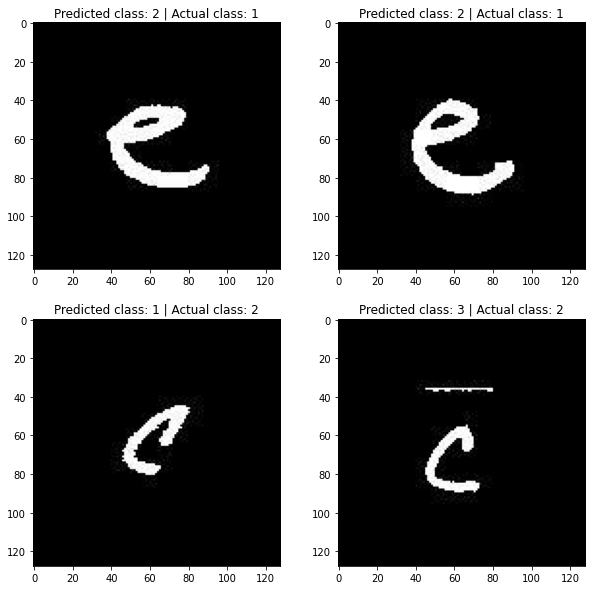

In [ ]:
#code for Question 2 here

fig = plt.figure(figsize = (10,10))
fig.add_subplot(2,2,1)
image = cv.imread(mis_classification_1[4][2])
plt.imshow(image)
plt.title("Predicted class: "+str(mis_classification_1[4][0]+1)+" | Actual class: "+str(mis_classification_1[4][1]+1))
fig.add_subplot(2,2,2)
image = cv.imread(mis_classification_1[5][2])
plt.imshow(image)
plt.title("Predicted class: "+str(mis_classification_1[5][0]+1)+" | Actual class: "+str(mis_classification_1[5][1]+1))
fig.add_subplot(2,2,3)
image = cv.imread(mis_classification_1[-5][2])
plt.imshow(image)
plt.title("Predicted class: "+str(mis_classification_1[-5][0]+1)+" | Actual class: "+str(mis_classification_1[-5][1]+1))
fig.add_subplot(2,2,4)
image = cv.imread(mis_classification_1[-6][2])
plt.imshow(image)
plt.title("Predicted class: "+str(mis_classification_1[-6][0]+1)+" | Actual class: "+str(mis_classification_1[-6][1]+1))

## Question 2

Give 4 examples of images from the test set that are misclassified by the classifier designed. Display both the state of nature (true label) and the predicted class for each image and the possible reason behind the misclassification.



Text(0.5, 1.0, 'Predicted class: 1 | Actual class: 2')

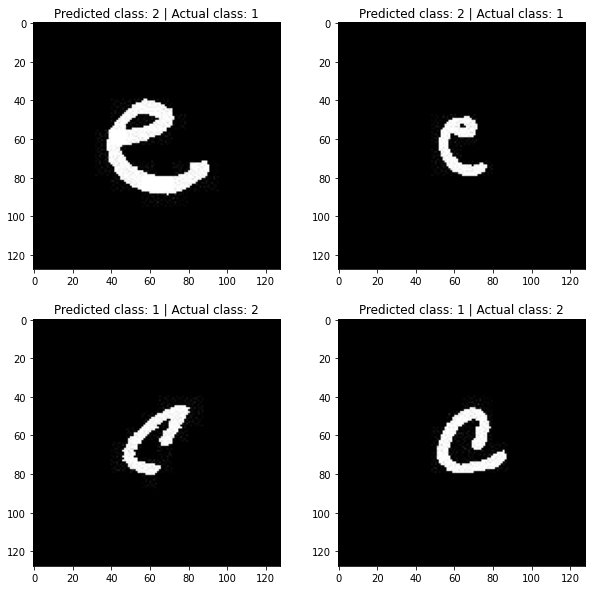

In [ ]:
fig = plt.figure(figsize = (10,10))
fig.add_subplot(2,2,1)
image = cv.imread(mis_classification_2[4][2])
plt.imshow(image)
plt.title("Predicted class: "+str(mis_classification_2[4][0]+1)+" | Actual class: "+str(mis_classification_2[4][1]+1))
fig.add_subplot(2,2,2)
image = cv.imread(mis_classification_2[5][2])
plt.imshow(image)
plt.title("Predicted class: "+str(mis_classification_2[5][0]+1)+" | Actual class: "+str(mis_classification_2[5][1]+1))
fig.add_subplot(2,2,3)
image = cv.imread(mis_classification_1[-5][2])
plt.imshow(image)
plt.title("Predicted class: "+str(mis_classification_2[-5][0]+1)+" | Actual class: "+str(mis_classification_2[-5][1]+1))
fig.add_subplot(2,2,4)
image = cv.imread(mis_classification_2[-6][2])
plt.imshow(image)
plt.title("Predicted class: "+str(mis_classification_2[-6][0]+1)+" | Actual class: "+str(mis_classification_2[-6][1]+1))

**Question 3**
What is the effect of the regularization factor $\lambda$ on the performance of the Bayes Classifier?

Regularation parameter is multiplied with identity matrix and add it to covariance matrix to make it invertiable to improve classifer performance and reduce the error.If training  samples  are  limited,  we  can  add  a  regularization  parameter λI to make sure that it can be inverted.